In [ ]:
!pip install import-ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import import_ipynb

from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math
import imutils
import time
import cv2
import os

In [ ]:
data_dir=('/content/drive/MyDrive/Ev')
path=[os.path.join(data_dir,file) for file in os.listdir(data_dir)]

In [ ]:
faces=[]
labels=[]

In [ ]:
from PIL import Image
for image in path:
    print(image)
    img=Image.open(image).convert('L') # conver in gray scale 
    imageNp = np.array(img,'uint8')
    try:
      id=int(os.path.split(image)[1].split('_')[0])
    except:
      continue
    faces.append(imageNp)
    labels.append(id)

In [ ]:
labels=np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(faces, labels, test_size=0.94, stratify=labels)

In [ ]:
clf = cv2.face.LBPHFaceRecognizer_create()
clf.train(X_train,y_train)

In [ ]:
predictions = []
confidence = []

for i in range(0 , len(X_test)):
  (prediction , confidence) = clf.predict(X_test[i])
  predictions.append(prediction)

In [ ]:
f1_score(y_test,predictions,average="macro")

0.9509719133968856

In [ ]:
accuracy_score(y_test,predictions)

0.951063829787234

In [ ]:
array = confusion_matrix(y_test,predictions)

In [ ]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           1       0.96      1.00      0.98        47\n           2       0.98      1.00      0.99        47\n           3       0.60      0.77      0.67        47\n           4       0.98      1.00      0.99        47\n           5       1.00      0.96      0.98        47\n           6       1.00      1.00      1.00        47\n           7       1.00      1.00      1.00        47\n          10       1.00      0.96      0.98        47\n          11       1.00      1.00      1.00        47\n         123       1.00      1.00      1.00        47\n       12345       1.00      1.00      1.00        47\n     4071997       1.00      1.00      1.00        47\n    21100001       1.00      1.00      1.00        47\n    21174183       1.00      1.00      1.00        47\n    21174184       1.00      1.00      1.00        47\n    21174186       0.98      0.96      0.97        47\n    21174188       1.00      1.00      1.00        47\n    211

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        47
           2       0.98      1.00      0.99        47
           3       0.60      0.77      0.67        47
           4       0.98      1.00      0.99        47
           5       1.00      0.96      0.98        47
           6       1.00      1.00      1.00        47
           7       1.00      1.00      1.00        47
          10       1.00      0.96      0.98        47
          11       1.00      1.00      1.00        47
         123       1.00      1.00      1.00        47
       12345       1.00      1.00      1.00        47
     4071997       1.00      1.00      1.00        47
    21100001       1.00      1.00      1.00        47
    21174183       1.00      1.00      1.00        47
    21174184       1.00      1.00      1.00        47
    21174186       0.98      0.96      0.97        47
    21174188       1.00      1.00      1.00        47
    21174189       0.96      1.00      0.98        47
    21174190       0.61      0.49      0.54        47
    21175191       1.00      0.89      0.94        47

    accuracy                           0.95       940
   macro avg       0.95      0.95      0.95       940
weighted avg       0.95      0.95      0.95       940


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


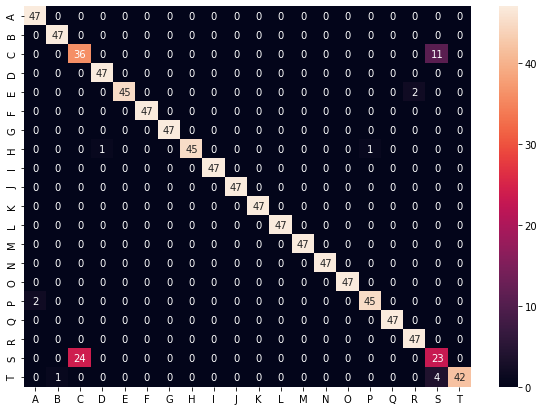

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(array, index = [i for i in "ABCDEFGHIJKLMNOPQRST"],
                  columns = [i for i in "ABCDEFGHIJKLMNOPQRST"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [ ]:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        25
           5       1.00      0.96      0.98        25
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        25
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        25
         123       1.00      1.00      1.00        25
       12345       1.00      1.00      1.00        25
     4071997       1.00      1.00      1.00        25
    21100001       1.00      1.00      1.00        25
    21174183       1.00      1.00      1.00        25
    21174184       1.00      1.00      1.00        25
    21174186       1.00      1.00      1.00        25
    21174188       1.00      1.00      1.00        25
    21174189       0.96      1.00      0.98        25
    21174190       1.00      1.00      1.00        25
    21175191       1.00      1.00      1.00        25

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500


In [ ]:
!pip install import-ipynb
import import_ipynb
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage import feature
import numpy as np
import cv2
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
class LocalBinaryPatterns:
  def __init__(self , numPoints , radius):
    self.numPoints = numPoints
    self.radius = radius

  def describe(self , image , eps=1e-7):
    lbp = feature.local_binary_pattern(image , self.numPoints , self.radius)
    hist = plt.hist(lbp.ravel())
    return lbp , hist

In [ ]:
desc = LocalBinaryPatterns(8 , 2)

In [ ]:
def face_detection(image):
  cascadePath = "haarcascade_frontalface_default.xml"
  detector = cv2.CascadeClassifier(cascadePath)

  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  rects = detector.detectMultiScale(gray, scaleFactor=1.05,
	minNeighbors=10, minSize=(30, 30),
	flags=cv2.CASCADE_SCALE_IMAGE)

  return rects

In [ ]:
def preprocess_img(imagePath):
  img = cv2.imread(imagePath)
  rects = face_detection(img)
  print(rects)
  for (x , y , w , h) in rects:
    face = img[y:y+h , x:x+w]

  face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
  
  lbp , hist = desc.describe(face)
  return lbp , hist

In [ ]:
imagePath = '/content/drive/MyDrive/Ev/1_1.png'

[[ 28  21 352 352]]


AttributeError: ignored

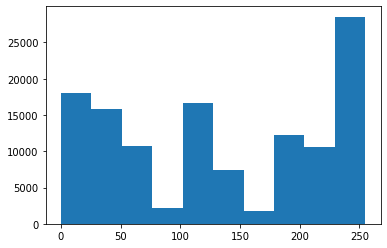

In [ ]:
lbp , hist = preprocess_img(imagePath)
hist.savefig("hist.png")

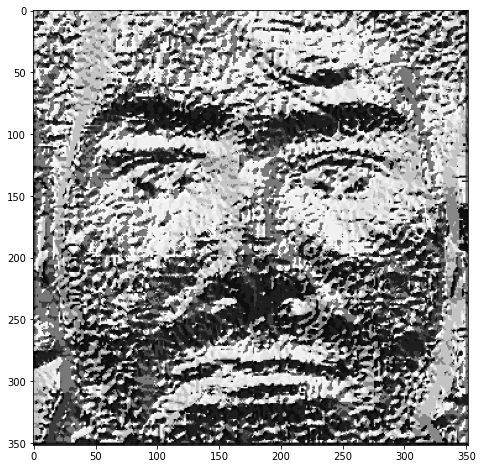

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(lbp , cmap="gray")
plt.savefig("extracted-face.png")